In [2]:
import numpy as np
from tensorflow import keras
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

## NumPy 研究分布

In [3]:
## Fashion-MNIST labels 的分布

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), \
    (test_images, test_labels) = fashion_mnist.load_data()
num_classes = np.max(train_labels) + 1  # 10

### train_labels

原始分布

In [5]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [6]:
np.histogram(train_labels) # 统计各个数字的个数

(array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
       dtype=int64),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]))

(array([6000.,    0.,    0.,    0., 6000.,    0.,    0.,    0., 6000.,
           0.,    0.,    0., 6000.,    0.,    0.,    0., 6000.,    0.,
           0.,    0., 6000.,    0.,    0.,    0., 6000.,    0.,    0.,
           0., 6000.,    0.,    0.,    0., 6000.,    0.,    0., 6000.]),
 array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 ,
        2.75, 3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75, 5.  , 5.25,
        5.5 , 5.75, 6.  , 6.25, 6.5 , 6.75, 7.  , 7.25, 7.5 , 7.75, 8.  ,
        8.25, 8.5 , 8.75, 9.  ]),
 <a list of 36 Patch objects>)

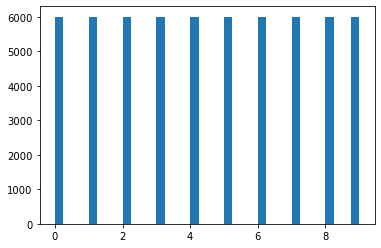

In [7]:
plt.hist(train_labels, bins='auto')

array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
      dtype=int64)

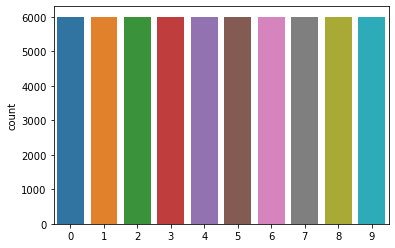

In [8]:
# 使用 seaborn 库
g = sns.countplot(train_labels)
np.bincount(train_labels)

#### random_labels

random 会改变 train_labels 的分布

(array([5914.,    0.,    0.,    0., 5877.,    0.,    0.,    0., 5947.,
           0.,    0.,    0., 5999.,    0.,    0.,    0., 6000.,    0.,
           0.,    0., 6107.,    0.,    0.,    0., 6107.,    0.,    0.,
           0., 5962.,    0.,    0.,    0., 5969.,    0.,    0., 6118.]),
 array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 ,
        2.75, 3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75, 5.  , 5.25,
        5.5 , 5.75, 6.  , 6.25, 6.5 , 6.75, 7.  , 7.25, 7.5 , 7.75, 8.  ,
        8.25, 8.5 , 8.75, 9.  ]),
 <a list of 36 Patch objects>)

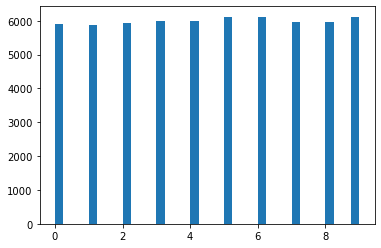

In [9]:
np.random.seed(42)
_labels = np.random.randint(0, 10, train_labels.shape[0])
np.histogram(_labels) # 统计各个数字的个数
plt.hist(_labels, bins='auto')

#### shuffle_labels

shuffle 不会改变 train_labels 的分布

In [10]:
_labels = train_labels # 传引用，要复制一份
_labels = np.copy(train_labels) # 

In [11]:
np.random.shuffle(_labels) # 原地操作，无返回

(array([6000.,    0.,    0.,    0., 6000.,    0.,    0.,    0., 6000.,
           0.,    0.,    0., 6000.,    0.,    0.,    0., 6000.,    0.,
           0.,    0., 6000.,    0.,    0.,    0., 6000.,    0.,    0.,
           0., 6000.,    0.,    0.,    0., 6000.,    0.,    0., 6000.]),
 array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 ,
        2.75, 3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75, 5.  , 5.25,
        5.5 , 5.75, 6.  , 6.25, 6.5 , 6.75, 7.  , 7.25, 7.5 , 7.75, 8.  ,
        8.25, 8.5 , 8.75, 9.  ]),
 <a list of 36 Patch objects>)

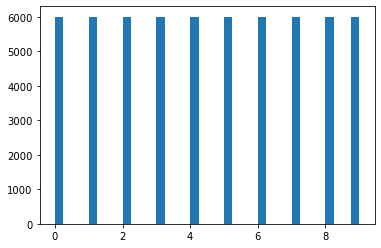

In [12]:
np.histogram(_labels) # 统计各个数字的个数
plt.hist(_labels, bins='auto')

#### corrupted_labels

依概率 p 给每个 label 随机选择一个类

In [13]:
p = 0.7
_labels = np.copy(train_labels)
np.random.seed(42)
for i in tqdm(range(_labels.shape[0])):
    if np.random.uniform() < p:
        _labels[i] = np.random.randint(
            0, num_classes)  # corrupted this label

100%|██████████| 60000/60000 [00:00<00:00, 94393.67it/s]


(array([5998.,    0.,    0.,    0., 5906.,    0.,    0.,    0., 5972.,
           0.,    0.,    0., 6012.,    0.,    0.,    0., 5982.,    0.,
           0.,    0., 6008.,    0.,    0.,    0., 6014.,    0.,    0.,
           0., 5987.,    0.,    0.,    0., 5964.,    0.,    0., 6157.]),
 array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 ,
        2.75, 3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75, 5.  , 5.25,
        5.5 , 5.75, 6.  , 6.25, 6.5 , 6.75, 7.  , 7.25, 7.5 , 7.75, 8.  ,
        8.25, 8.5 , 8.75, 9.  ]),
 <a list of 36 Patch objects>)

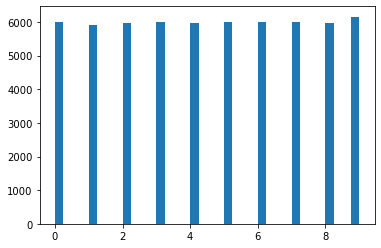

In [14]:
np.histogram(_labels) # 统计各个数字的个数
plt.hist(_labels, bins='auto')